In [1]:
import sys
sys.path.append("../../")

In [2]:
import random
import numpy as np
import torch
from mpl_toolkits.axes_grid1 import make_axes_locatable
from botorch.utils.sampling import draw_sobol_samples
from botorch.test_functions.multi_objective import GMM, BraninCurrin

tkwargs = {
    "dtype": torch.double,
    "device": torch.device("cpu"),
}
SEED = 42
# Setting seed for reproducibility
random.seed(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)

In [3]:
# define problem
problem = BraninCurrin(negate=True).to(**tkwargs)
# problem = GMM(negate=True).to(**tkwargs)
# problem.ref_point = torch.tensor([0., 0.], **tkwargs)

In [4]:
def generate_initial_data(problem, n=6):
    # generate training data
    train_x = draw_sobol_samples(bounds=problem.bounds, n=n, q=1).squeeze(1)
    train_obj = problem(train_x)
    return train_x, train_obj

In [5]:
init_x, init_y = generate_initial_data(problem, n=20)

## Generate data

In [6]:
from optimizers.angle_decomposition import AngleDecomp

2024-06-13 20:34:45,126 | AngleDecomp


Iteration 0


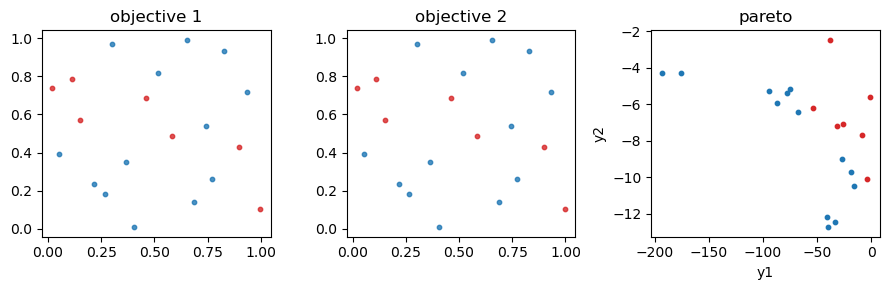

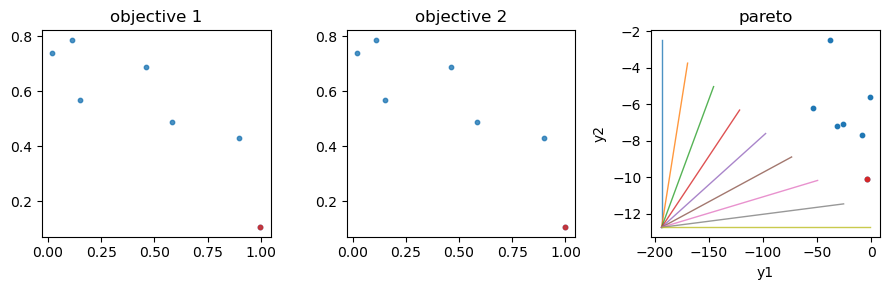

2024-06-13 20:34:50,603 | Model fitting takes 5.48s


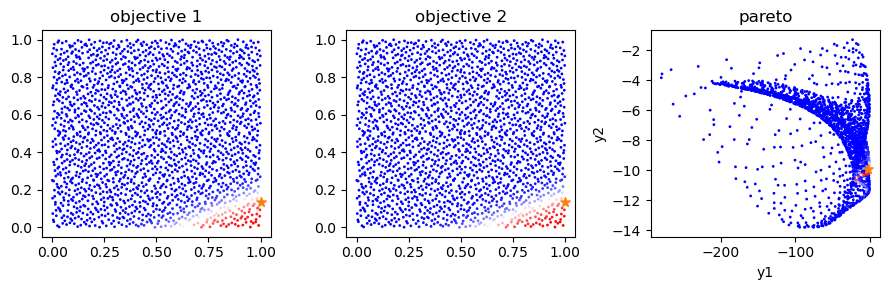

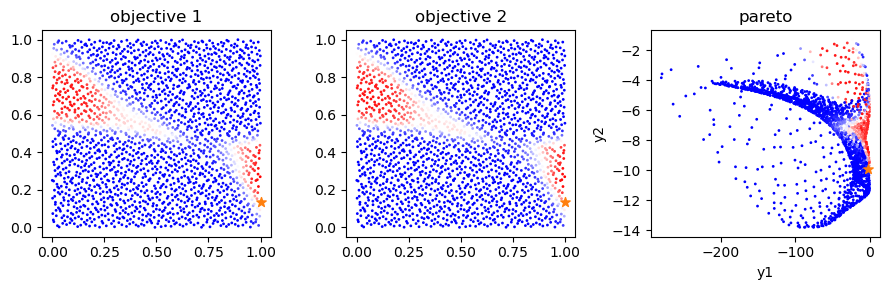

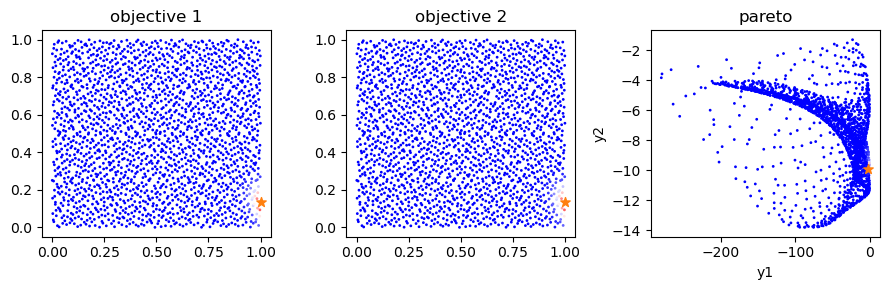

2024-06-13 20:34:52,918 | AngleDecomp


Iteration 1


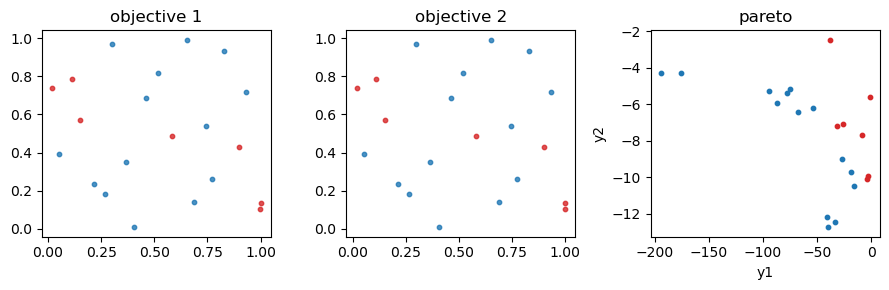

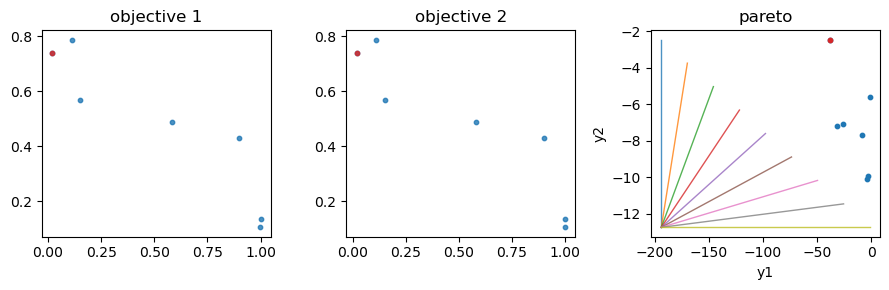

2024-06-13 20:34:58,349 | Model fitting takes 5.43s


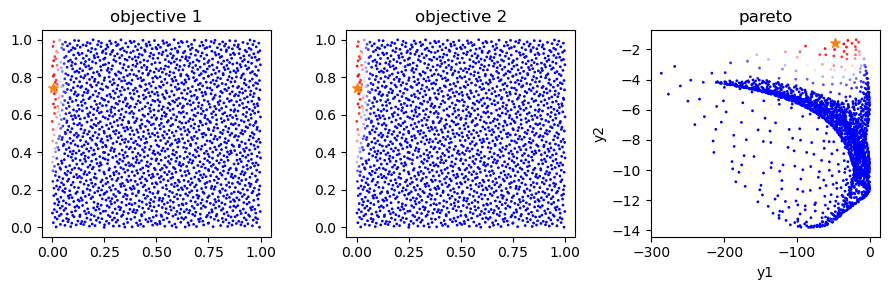

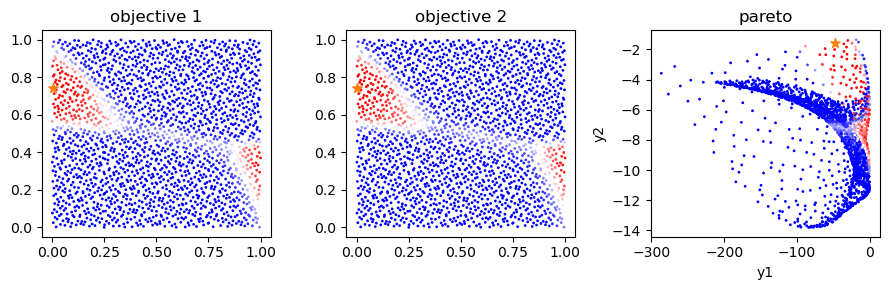

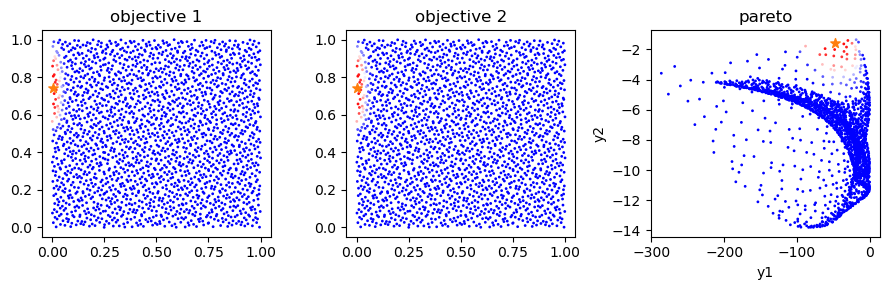

2024-06-13 20:35:00,731 | AngleDecomp


Iteration 2


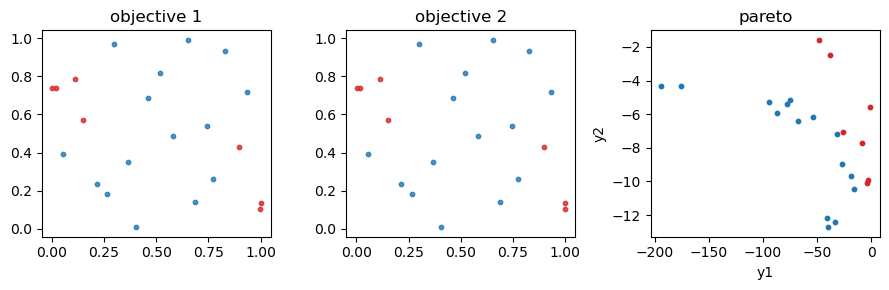

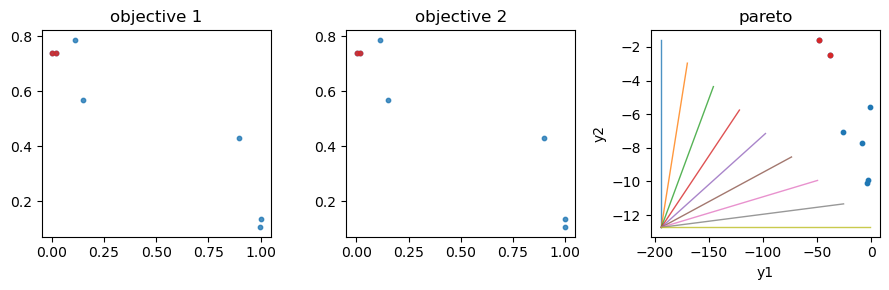

2024-06-13 20:35:06,293 | Model fitting takes 5.56s


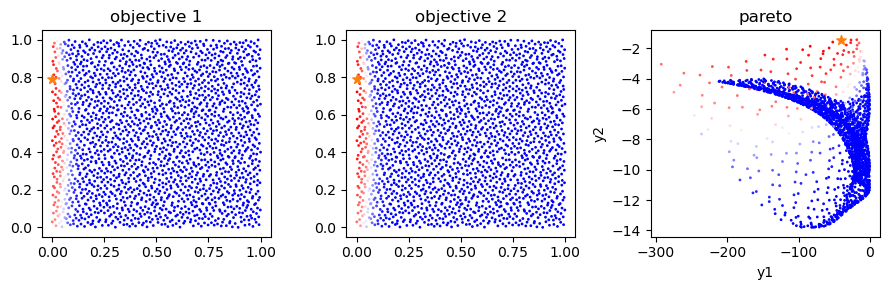

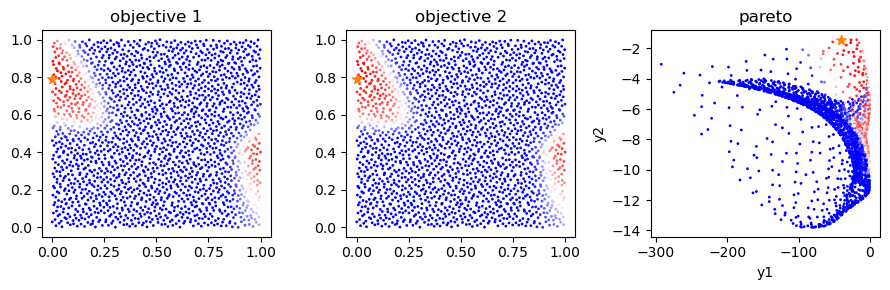

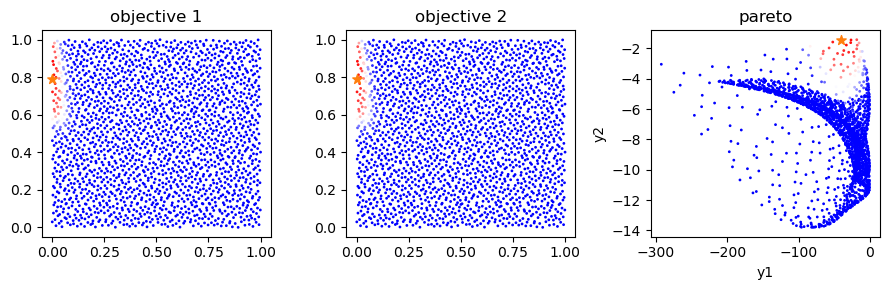

2024-06-13 20:35:09,063 | AngleDecomp


Iteration 3


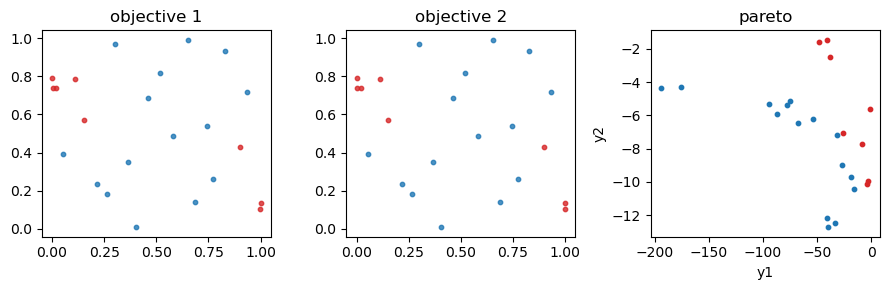

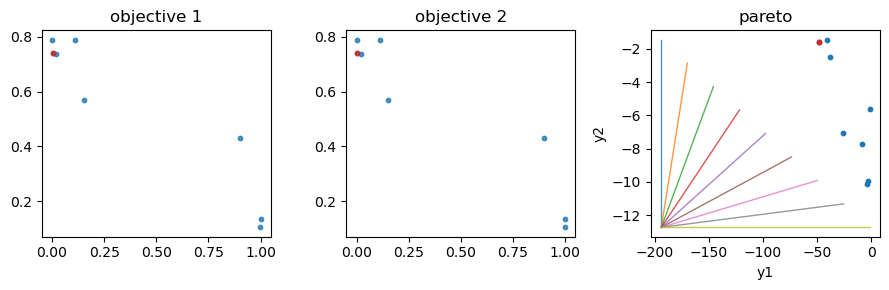

2024-06-13 20:35:14,376 | Model fitting takes 5.31s


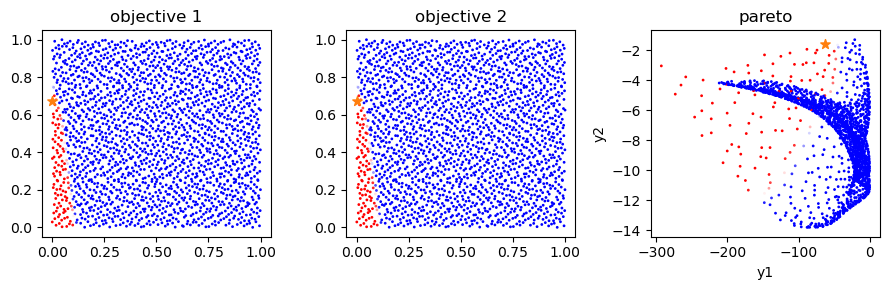

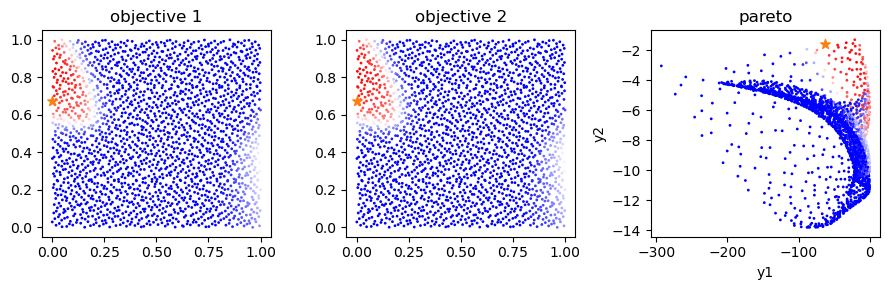

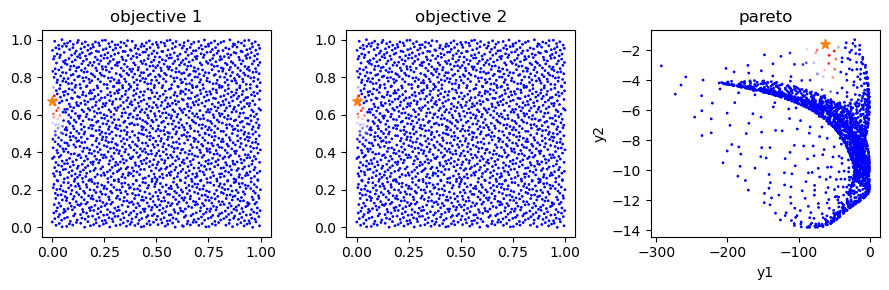

2024-06-13 20:35:16,864 | AngleDecomp


Iteration 4


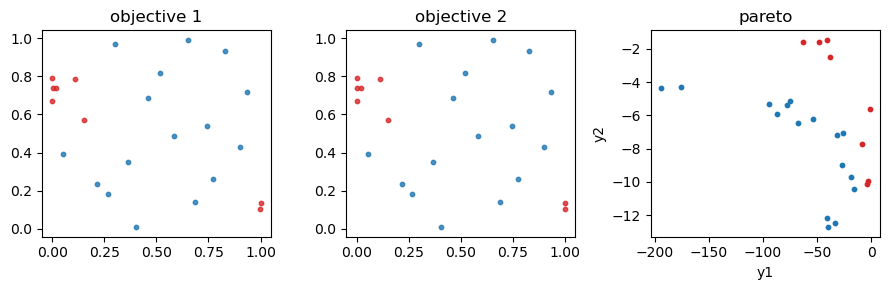

/home/paj7rng/workspace/mobo_experiments/demos/angle_decomposition/../../optimizers/angle_decomposition.py:323: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, **self.tkwargs)


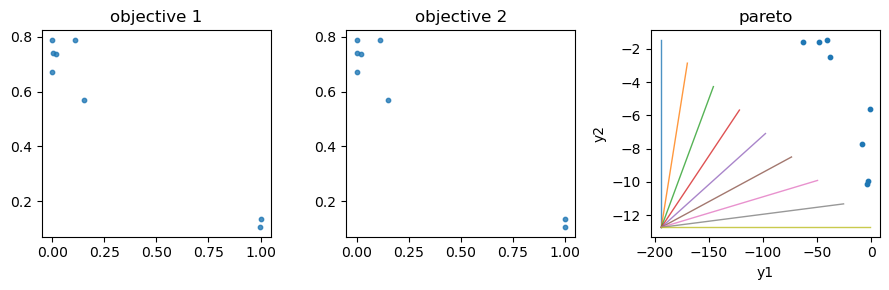

/home/paj7rng/workspace/mobo_experiments/demos/angle_decomposition/../../optimizers/angle_decomposition.py:182: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(x_a_train, **self.tkwargs),
2024-06-13 20:35:22,422 | Model fitting takes 5.56s


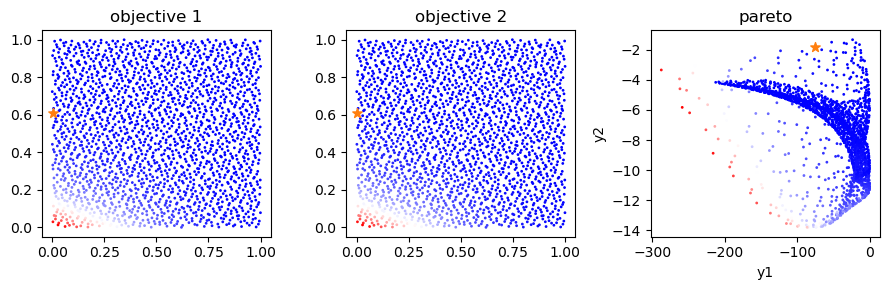

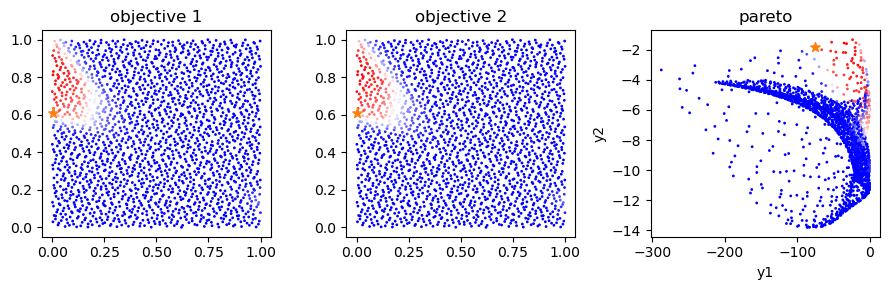

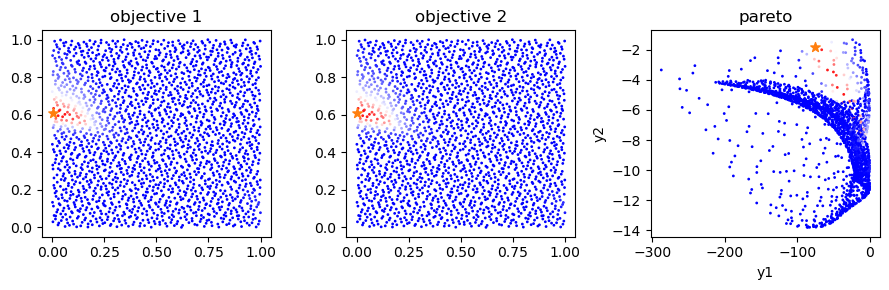

2024-06-13 20:35:24,628 | AngleDecomp


Iteration 5


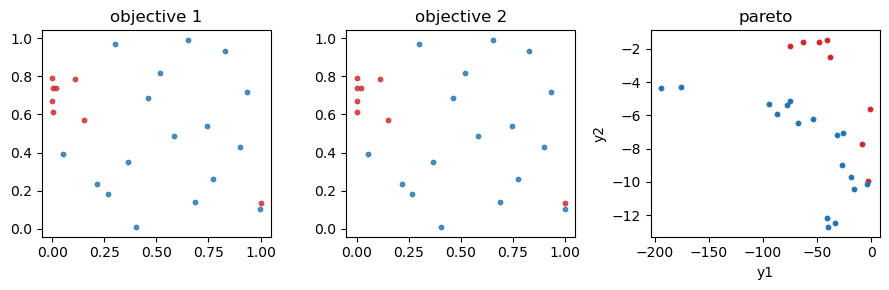

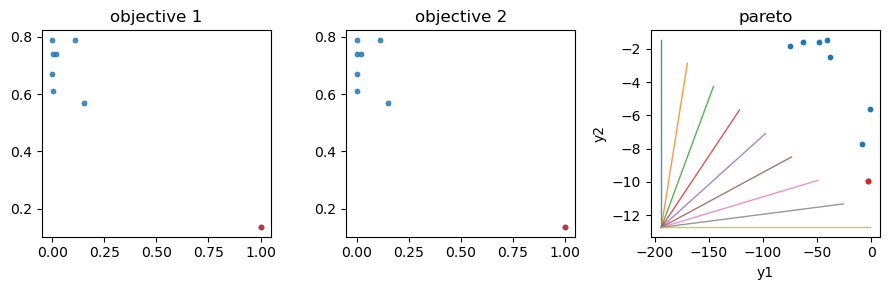

2024-06-13 20:35:30,250 | Model fitting takes 5.62s


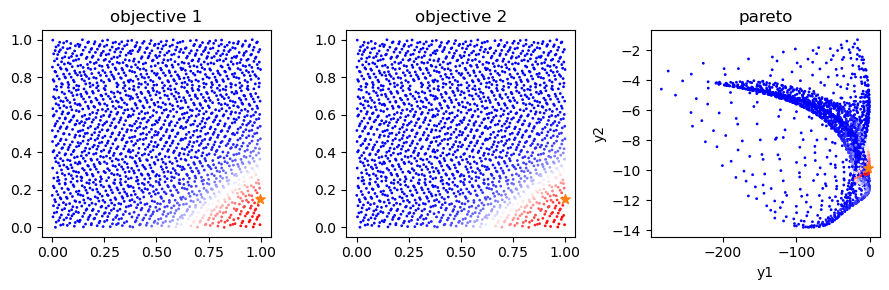

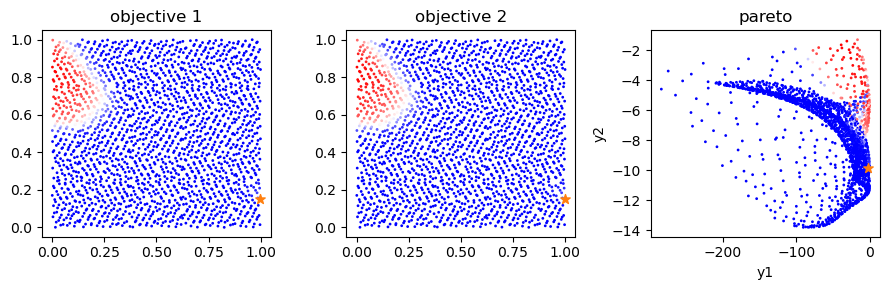

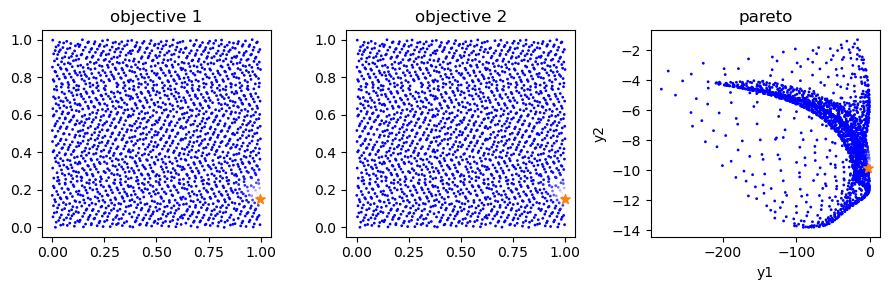

2024-06-13 20:35:32,616 | AngleDecomp


Iteration 6


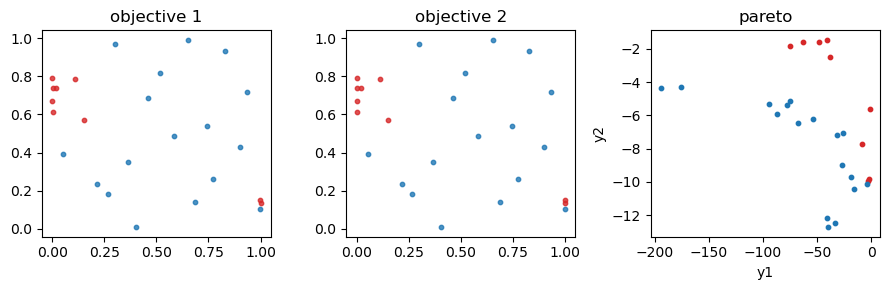

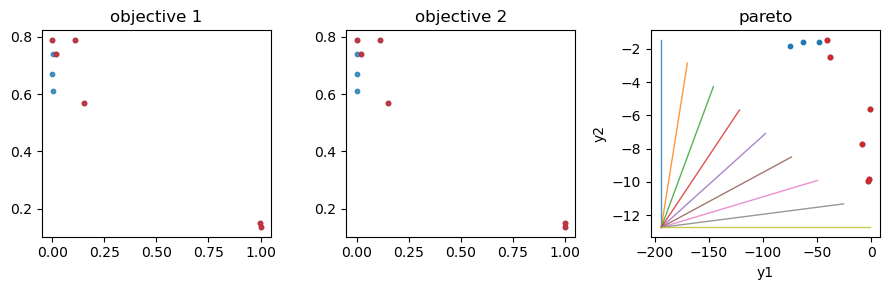

2024-06-13 20:35:38,487 | Model fitting takes 5.87s


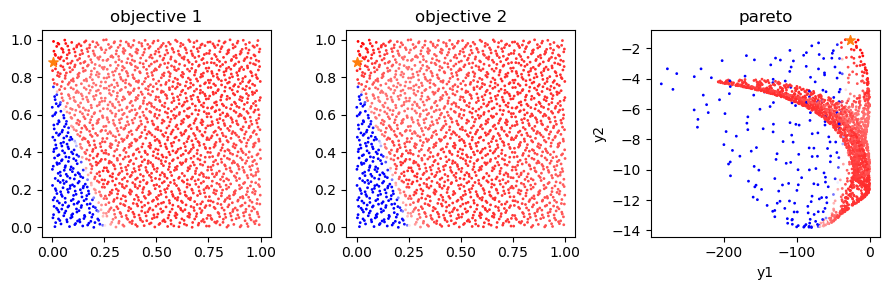

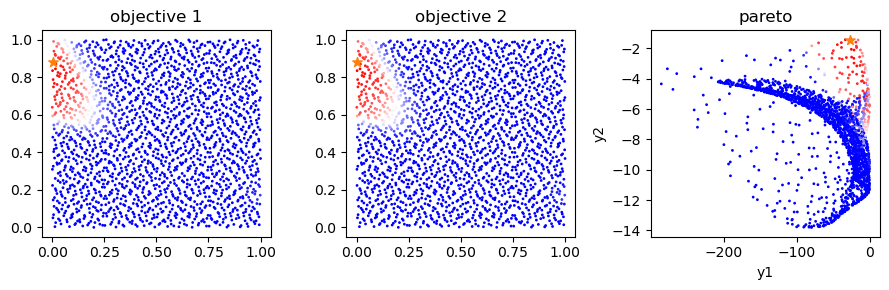

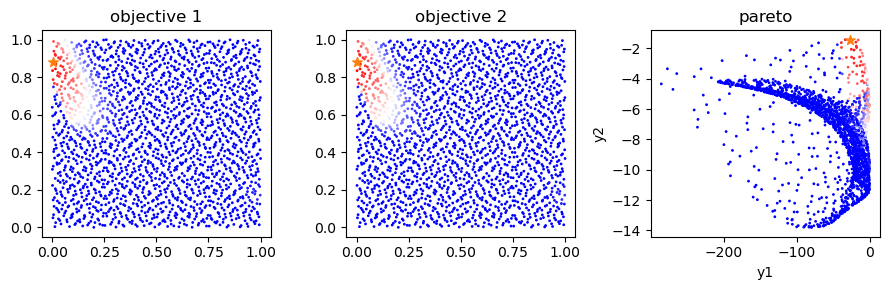

2024-06-13 20:35:41,145 | AngleDecomp


Iteration 7


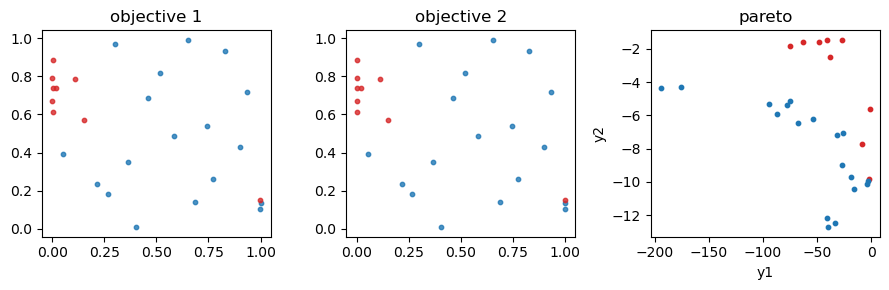

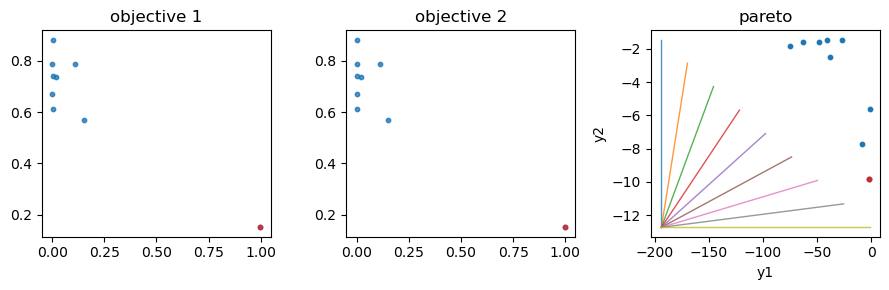

2024-06-13 20:35:47,104 | Model fitting takes 5.96s


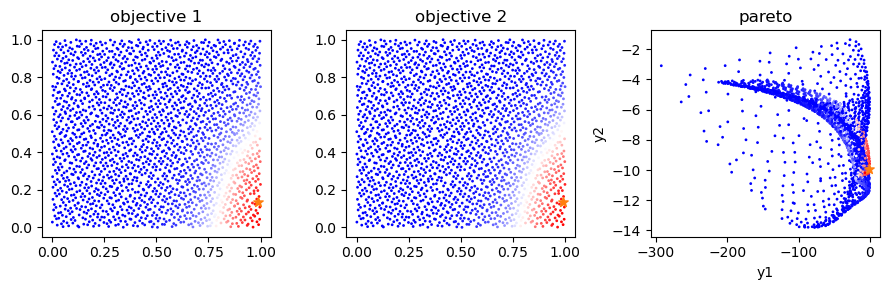

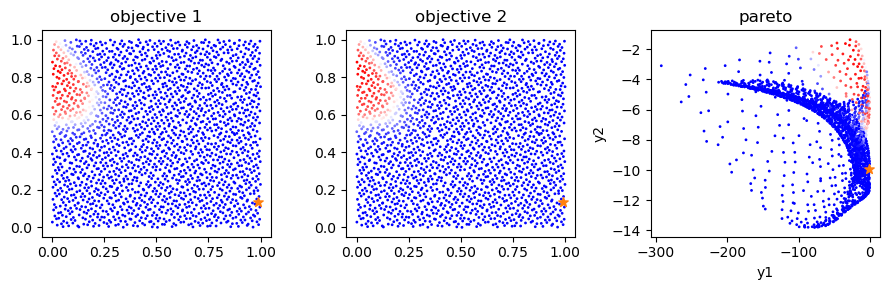

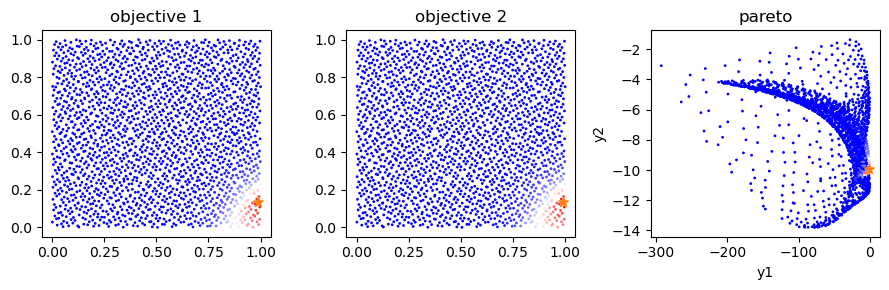

2024-06-13 20:35:49,591 | AngleDecomp


Iteration 8


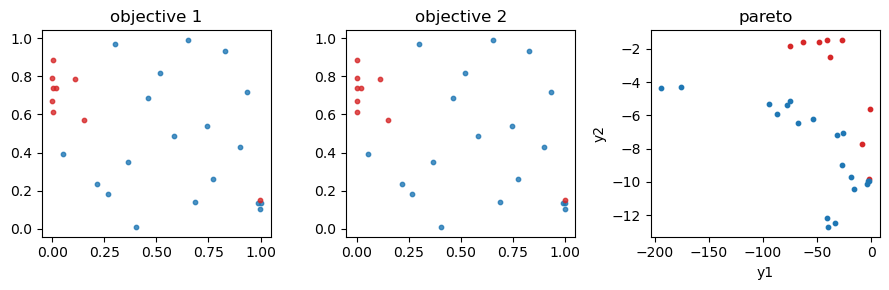

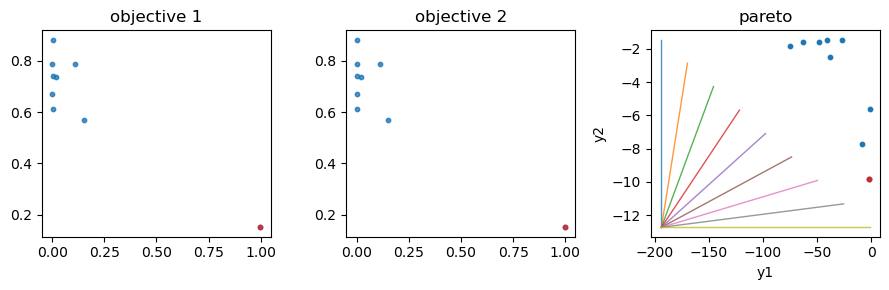

2024-06-13 20:35:55,587 | Model fitting takes 6.00s


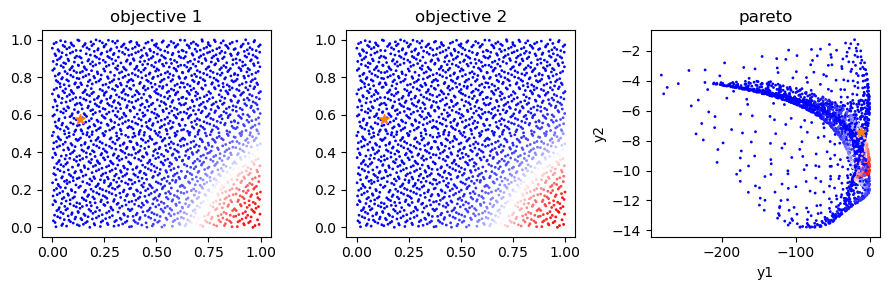

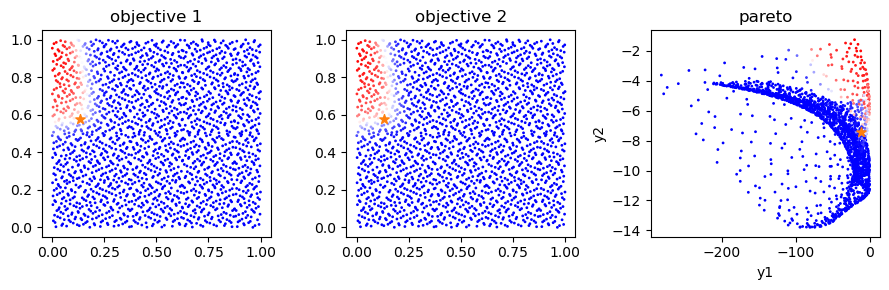

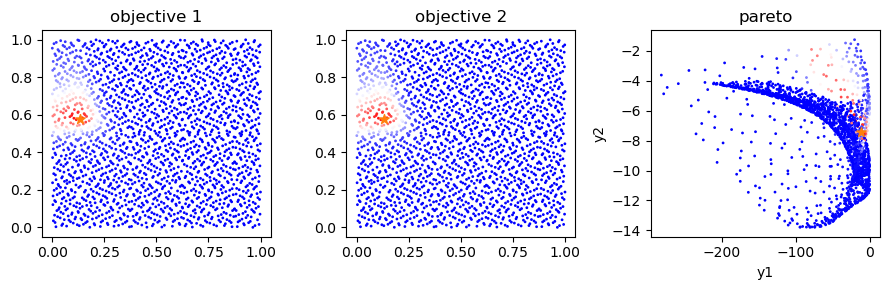

2024-06-13 20:35:57,964 | AngleDecomp


Iteration 9


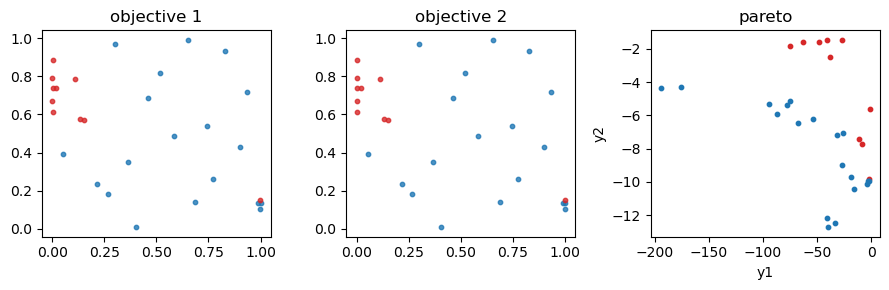

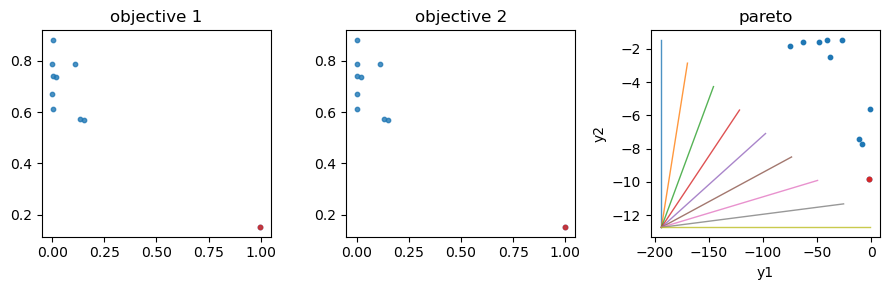

2024-06-13 20:36:03,501 | Model fitting takes 5.54s


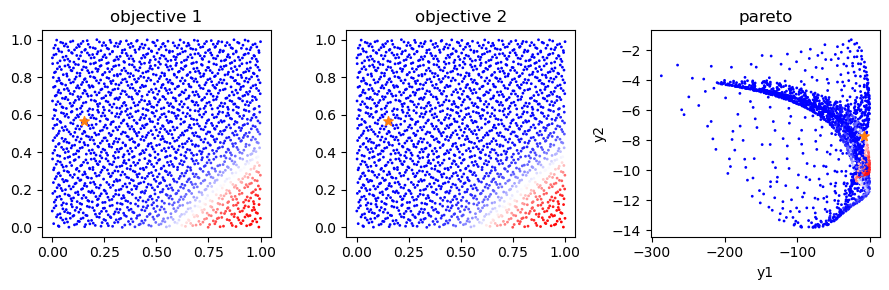

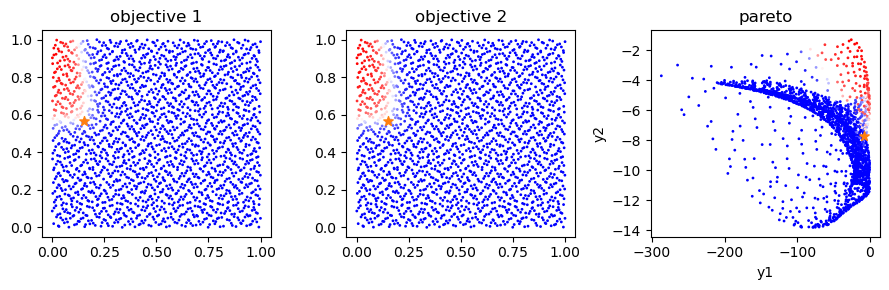

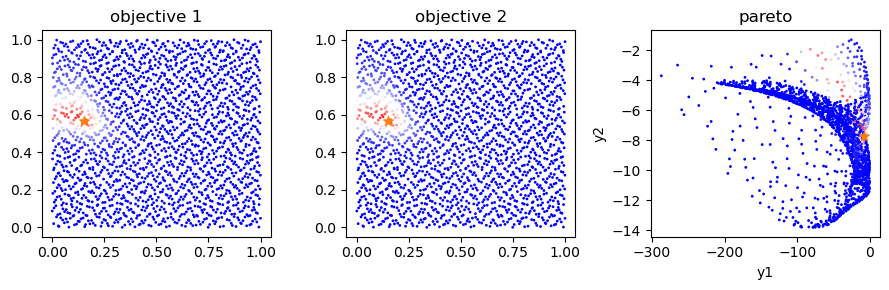

In [7]:
x_obs = init_x
y_obs = init_y

num_obj = problem.num_objectives
# only plot the first two dimensions
xx, yy = np.meshgrid(
    np.linspace(
        *problem.bounds.t()[0], 100
    ),
    np.linspace(
        *problem.bounds.t()[1], 100
    ),
)
x_cands = np.vstack((xx.flatten(), yy.flatten())).T
x_cands = torch.from_numpy(x_cands).to(**tkwargs)
y_cands = problem(x_cands).reshape(100, 100, num_obj)
xx_obj, yy_obj = y_cands[:, :, 0], y_cands[:, :, 1]

for n in range(10):
    print(f"Iteration {n}")
    optimizer = AngleDecomp(
        problem=problem,
        weight_type='ei'
    )
    new_x = optimizer.observe_and_suggest(x_obs, y_obs, S=100)
    new_y = problem(new_x)

    x_obs = torch.cat([x_obs, new_x])
    y_obs = torch.cat([y_obs, new_y])